In [1]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN','NAME'])

In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [7]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [8]:
# Look at CLASSIFICATION value counts for binning
counts2 = application_df['CLASSIFICATION'].value_counts()
counts2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C2190        1
C1245        1
C1248        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64

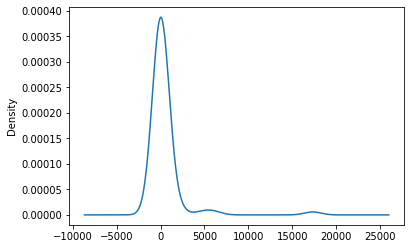

In [9]:
application_df.CLASSIFICATION.value_counts().plot.density()


In [11]:
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C2190        1
C1245        1
C1248        1
C2600        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C0,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1230,CLASSIFICATION_C1234,CLASSIFICATION_C1235,CLASSIFICATION_C1236,CLASSIFICATION_C1237,CLASSIFICATION_C1238,CLASSIFICATION_C1240,CLASSIFICATION_C1245,CLASSIFICATION_C1246,CLASSIFICATION_C1248,CLASSIFICATION_C1250,CLASSIFICATION_C1256,CLASSIFICATION_C1257,CLASSIFICATION_C1260,CLASSIFICATION_C1267,CLASSIFICATION_C1270,CLASSIFICATION_C1278,CLASSIFICATION_C1280,CLASSIFICATION_C1283,...,CLASSIFICATION_C3000,CLASSIFICATION_C3200,CLASSIFICATION_C3700,CLASSIFICATION_C4000,CLASSIFICATION_C4100,CLASSIFICATION_C4120,CLASSIFICATION_C4200,CLASSIFICATION_C4500,CLASSIFICATION_C5000,CLASSIFICATION_C5200,CLASSIFICATION_C6000,CLASSIFICATION_C6100,CLASSIFICATION_C7000,CLASSIFICATION_C7100,CLASSIFICATION_C7120,CLASSIFICATION_C7200,CLASSIFICATION_C7210,CLASSIFICATION_C8000,CLASSIFICATION_C8200,CLASSIFICATION_C8210,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.

In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y

array([1, 1, 0, ..., 0, 1, 0])

In [14]:
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [15]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [17]:
 #Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
X_train.shape


(25724, 108)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 763       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 1,212
Trainable params: 1,212
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [21]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6148 - accuracy: 0.6853 - val_loss: 0.5634 - val_accuracy: 0.7357
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5630 - accuracy: 0.7264 - val_loss: 0.5538 - val_accuracy: 0.7396
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5555 - accuracy: 0.7270 - val_loss: 0.5481 - val_accuracy: 0.7396
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7287 - val_loss: 0.5503 - val_accuracy: 0.7401
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7285 - val_loss: 0.5506 - val_accuracy: 0.7401
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5497 - accuracy: 0.7280 - val_loss: 0.5512 - val_accuracy: 0.7401
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7305 - val_loss: 0.5507 - val_accuracy: 0.7403

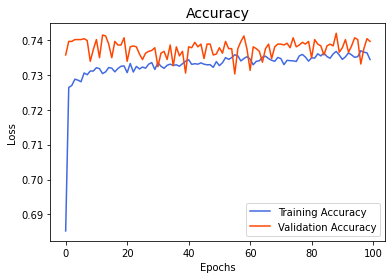

In [22]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'royalblue', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

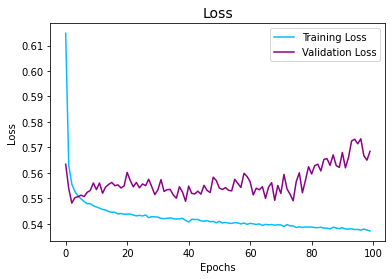

In [23]:
plt.title('Loss',fontsize=14)
plt.plot(fit_model.history['loss'], 'deepskyblue', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'darkmagenta', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                8720      
                                                                 
 dense_5 (Dense)             (None, 30)                2430      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,181
Trainable params: 11,181
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5782 - accuracy: 0.7175 - val_loss: 0.5628 - val_accuracy: 0.7352
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5566 - accuracy: 0.7275 - val_loss: 0.5553 - val_accuracy: 0.7341
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7295 - val_loss: 0.5553 - val_accuracy: 0.7365
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5501 - accuracy: 0.7301 - val_loss: 0.5541 - val_accuracy: 0.7339
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7292 - val_loss: 0.5498 - val_accuracy: 0.7383
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5461 - accuracy: 0.7316 - val_loss: 0.5546 - val_accuracy: 0.7362
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5459 - accuracy: 0.7303 - val_loss: 0.5472 - val_accuracy: 0.7365

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5627 - accuracy: 0.7303 - 273ms/epoch - 1ms/step
Loss: 0.5627440214157104, Accuracy: 0.7302623987197876


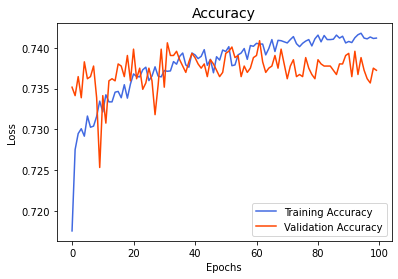

In [28]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'royalblue', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

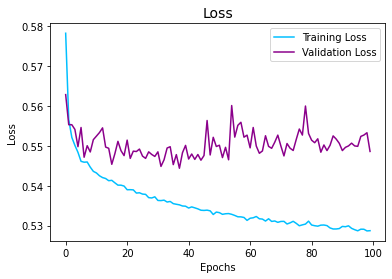

In [29]:
plt.title('Loss',fontsize=14)
plt.plot(fit_model.history['loss'], 'deepskyblue', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'darkmagenta', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()